In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, subprocess
%load_ext watermark

In [2]:
%watermark

2019-08-23T11:12:26+02:00

CPython 3.6.9
IPython 7.7.0

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 2
interpreter: 64bit


In [3]:
#parameters
#workingdir = r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/hsbm/oversigma_10tissue"
workingdir=r"/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/results/hsbm/5000doc_0.25occ_fpkmweight_thr"
execdir = r"/Users/filippo/Developer/tesi"
#dockerurl = "cloudadm@193.144.35.220:/home/cloudadm/drive"
dockerurl = "filippo.valle@c3s.unito.it:"

In [9]:
os.chdir(workingdir)

# Get the data
[Table_creation](Table_creation.ipynb) does this for you

# Get annotations

In [10]:
df_file=pd.read_csv("files.dat", index_col=[0])
df_file.head()

,primary_site,disease_type
85593c7d-7441-4d41-81d3-aaa17c7e398b,Stomach,Adenomas and Adenocarcinomas
bfeaa9f7-e413-40b8-86ba-c9d26a96c240,Cervix uteri,Squamous Cell Neoplasms
426b94fe-fcff-49f2-9d0b-c7cb49bb5559,Kidney,Adenomas and Adenocarcinomas
38083e21-7761-47c7-9112-769c7f85e283,Brain,Gliomas
6e2570b0-fc95-4ba9-a8a5-b79f6dea0246,Breast,Ductal and Lobular Neoplasms


In [11]:
df_file.groupby(by='primary_site').count()

,disease_type
primary_site,
Adrenal gland,111
Base of tongue,8
Bladder,186
Blood,92
"Bones, joints and articular cartilage of limbs",1
"Bones, joints and articular cartilage of other and unspecified sites",1
Brain,317
Breast,575
Bronchus and lung,460


In [12]:
pc=pd.read_csv("%s/genes.txt"%execdir, index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

,lenght,type_of_gene,exons
ENSG00000167578,18722.0,protein-coding,18696.0
ENSG00000078237,46830.0,protein-coding,38812.0
ENSG00000146083,11328.0,protein-coding,10691.0
ENSG00000158486,226330.0,protein-coding,217697.0
ENSG00000198242,4966.0,protein-coding,4375.0


# Run statistics
```python
import tacos
tacos.statistics()
tacos.shuffleLabels()
```

CHECK **BioParameters.h** before compiling

In [ ]:
os.chdir(workingdir)
os.system("cp %s/tacos/master/python/addo.py ."%execdir)
os.system("cp %s/tacos/master/data_mining ."%execdir)
os.system("chmod +x data_mining")
os.system("mv mainTable_all.csv mainTable.csv")
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")

# Analyse table and select genes

[Table_Analyser.ipynb](Table_Analyzer.ipynb)

In [ ]:
os.chdir(execdir)
from tableanalyser import scalinglawsandoverexpressed

In [ ]:
scalinglawsandoverexpressed(workingdir)

In [ ]:
os.chdir(workingdir)
os.system("mv mainTable.csv mainTable_all.csv")
os.system("mv mainTable_over.csv mainTable.csv")

# Make bipartite network
```bash
python addo.py
```
```python
import tacos
tacos.makegraph()
```

In [ ]:
os.chdir(workingdir)
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")
os.system("./data_mining 7")

In [ ]:
os.system("scp graph.xml.gz %s/."%dockerurl)

[hSBM.ipynb]()

# Run stochastic block model
```
docker run -it -p8888:8888 -u user -v $(PWD)/drive/:/home/user/ fvalle01/hsbm bash
jupyter notebook --ip0.0.0.0 --allow-root
```

download the data

In [ ]:
os.chdir(workingdir)
os.system("mkdir -p topsbm")
os.system("scp %s/* topsbm/."%dockerurl)

# Run cluster analysis

In [5]:
os.chdir(execdir)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
#geneontology

In [25]:
os.chdir(execdir)
import hsbmpy, importlib
importlib.reload(hsbmpy)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
os.chdir(workingdir)

True primary_site 5


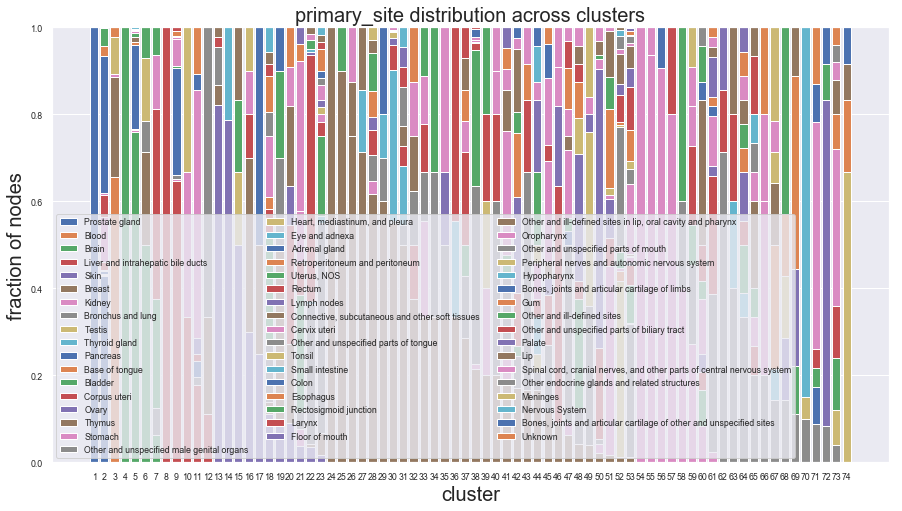

must shuffle files
True primary_site 4


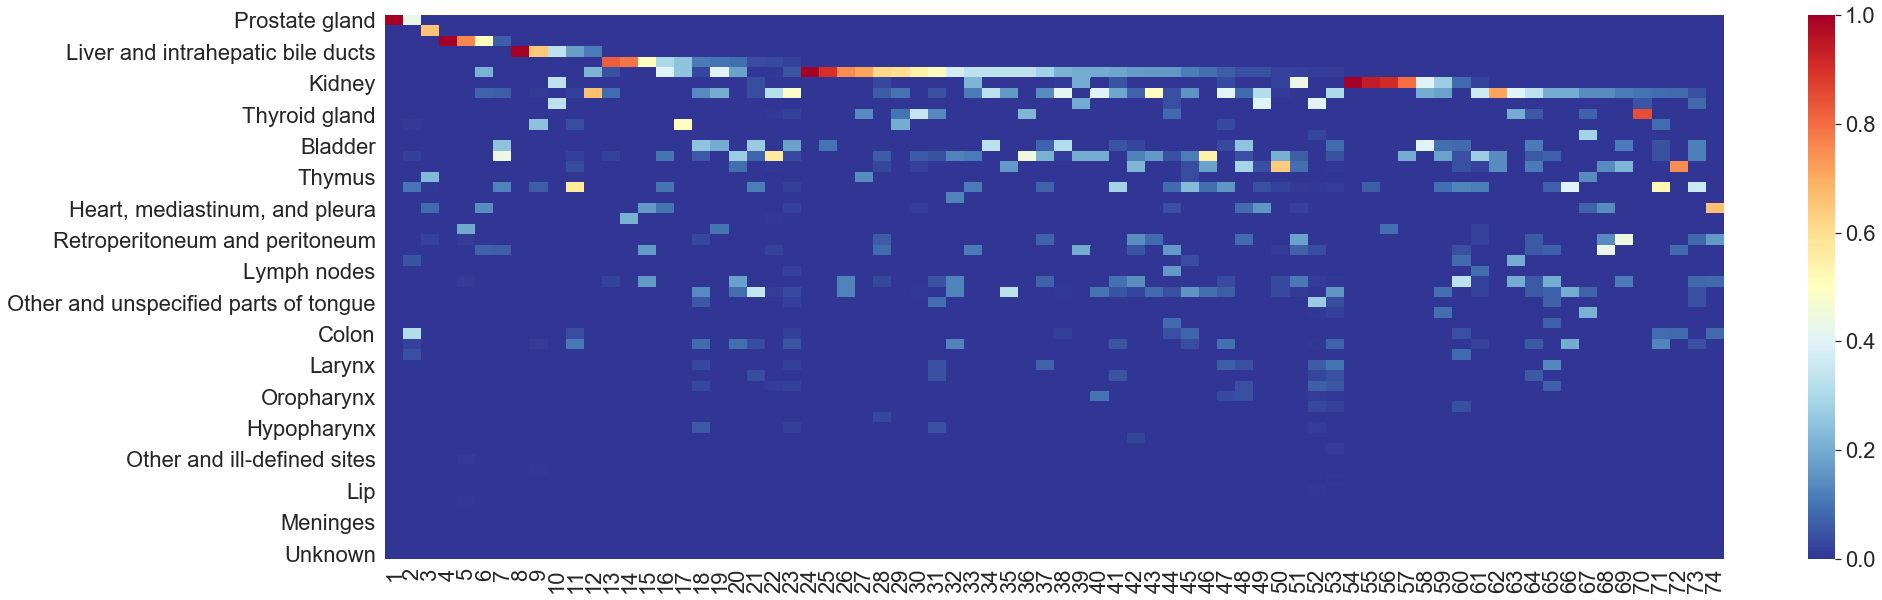

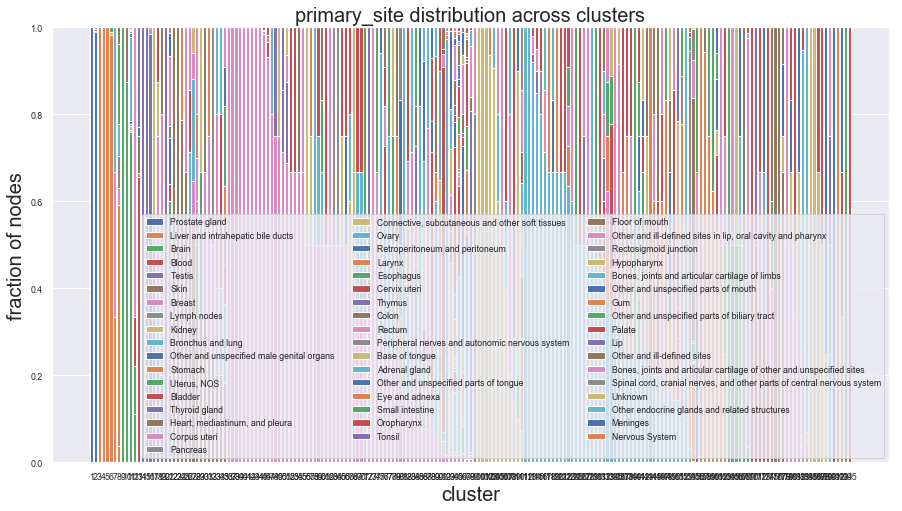

must shuffle files
True primary_site 3


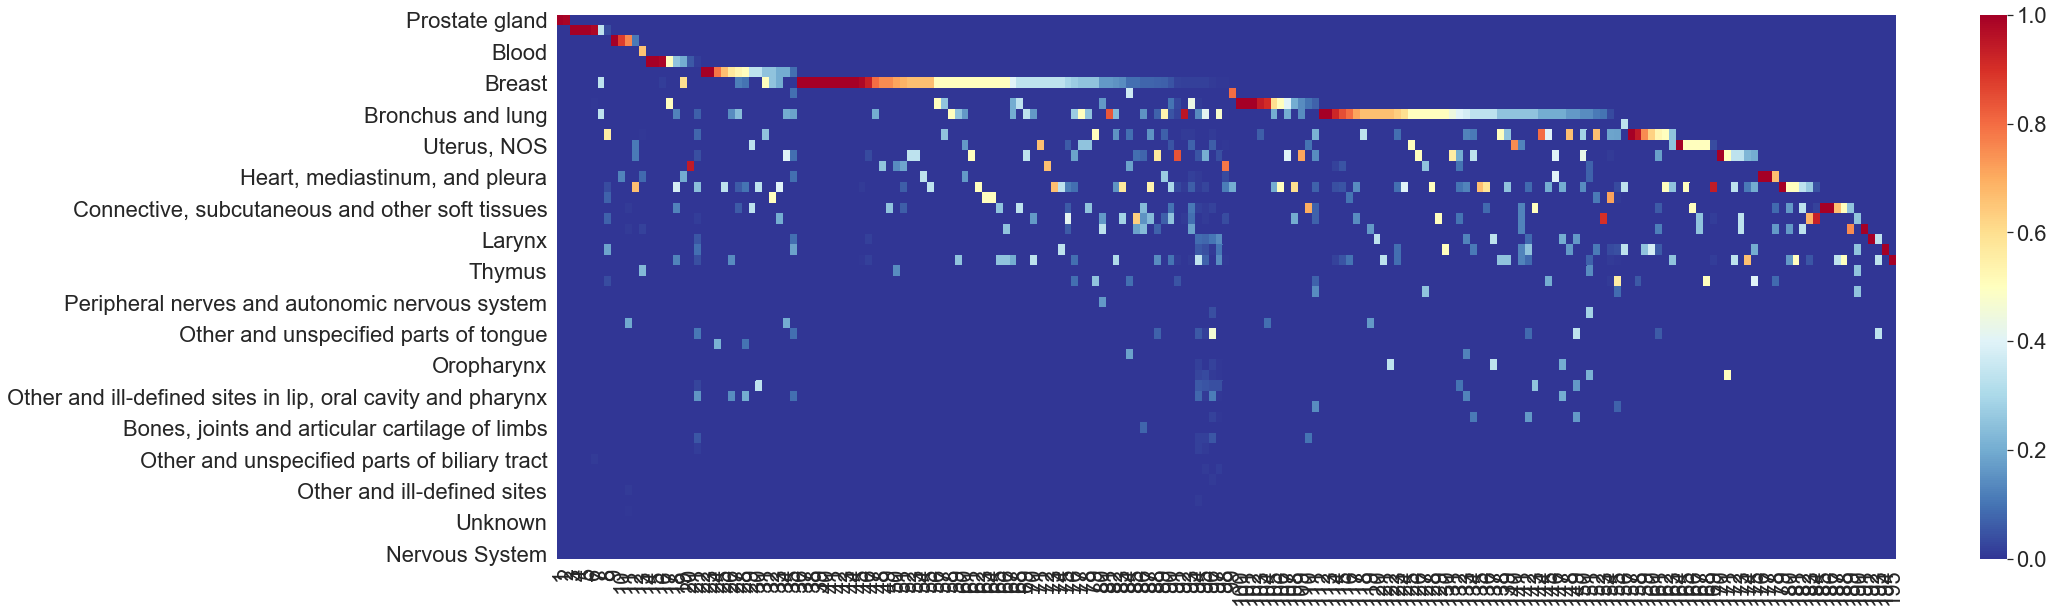

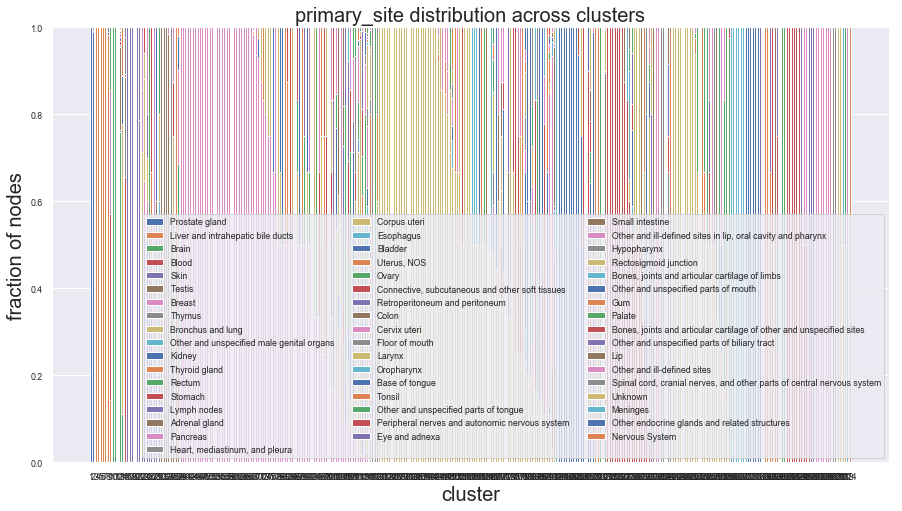

<class 'KeyboardInterrupt'>


KeyboardInterrupt: 

In [13]:
labels = df_file.columns
clusteranalysis(workingdir, labels, l=5)

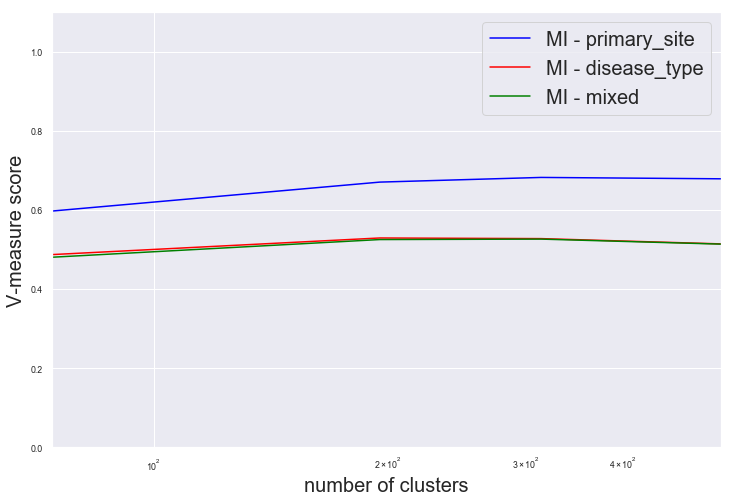

In [33]:
#scores = get_scores(workingdir,labels, L=5, verbose=False)
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=[k for k in scores.keys()],xl=getclustersizesarray(workingdir,l=5))
plt.show()
fig.savefig("%s/metric.pdf"%(workingdir))

In [ ]:
geneontology.topicanalysis()

# Clean

In [ ]:
os.chdir(workingdir)
os.system("rm -rf data_mining addo.py")